### Clean all data together so that the categorical conversion is applicable.!

In [98]:
import pandas as pd
import json
from pandas import json_normalize

df=pd.read_csv(r'./feature_importance/feature_imp_data.csv',header=[0])
print(df.shape)
df.head(2)

(8244, 13)


,Max Power,Max Torque,Year of Manufacture,modelYear,Cruise Control,Kms Driven,Engine Type,centralVariantId,Speakers Rear,Touch Screen,Cup Holders Rear,Rear Entertainment System,price
0,67.04,593,2015.0,2015,0,120000.0,293,3979,0,0,0,0,400000.0
1,121.31,146,2018.0,2018,0,32706.0,396,6087,1,1,0,0,811000.0


In [99]:
# import numpy as np

# # Select all numeric columns including 'price'
# numeric_cols = df.select_dtypes(include=[np.number]).columns

# # Apply 3-sigma rule across all numeric columns
# for col in numeric_cols:
#     mean = df[col].mean()
#     std = df[col].std()
#     lower = mean - 3 * std
#     upper = mean + 3 * std
#     df = df[(df[col] >= lower) & (df[col] <= upper)]

# print(f"Outliers removed using 3-sigma on columns: {list(numeric_cols)}")
# print(df.shape)

In [100]:
import numpy as np

# Calculate mean and standard deviation for price
mean_price = df['price'].mean()
std_price = df['price'].std()

# Define 3-sigma bounds
lower_bound = mean_price - 3 * std_price
upper_bound = mean_price + 3 * std_price

# Filter the DataFrame to keep only rows within 3-sigma range
df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

print(f"Filtered data within 3-sigma range for 'price': {lower_bound:.2f} to {upper_bound:.2f}")


Filtered data within 3-sigma range for 'price': -3273232.22 to 5191793.76


In [101]:
df_x = df.drop(columns=['price'])
df_y = df[['price']]

In [102]:
print(df_x.shape)
print(df_y.shape)

(8091, 12)
(8091, 1)


### ML model for prediction: RFR

In [103]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Assume df_x (input features) and df_y (target) are already defined
# Encode any categorical variables in df_x if needed
df_x_encoded = df_x.copy()

for col in df_x_encoded.select_dtypes(include='object').columns:
    df_x_encoded[col] = LabelEncoder().fit_transform(df_x_encoded[col].astype(str))

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df_x_encoded, df_y, test_size=0.2, random_state=42)

# Train Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train.values.ravel())

# Make predictions on train and test data
train_predictions = rf.predict(X_train)
test_predictions = rf.predict(X_test)
# Calculate evaluation metrics: MAE, MSE, R-squared
train_mae = mean_absolute_error(y_train, train_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)

train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

# Display the metrics
print(f"Train MAE: {train_mae}")
print(f"Test MAE: {test_mae}")

print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")

print(f"Train R-squared: {train_r2}")
print(f"Test R-squared: {test_r2}")

Train MAE: 43277.54966767712
Test MAE: 128525.0619731953
Train MSE: 6551999268.992023
Test MSE: 62760928832.75539
Train R-squared: 0.9885297013006819
Test R-squared: 0.9011342633529343


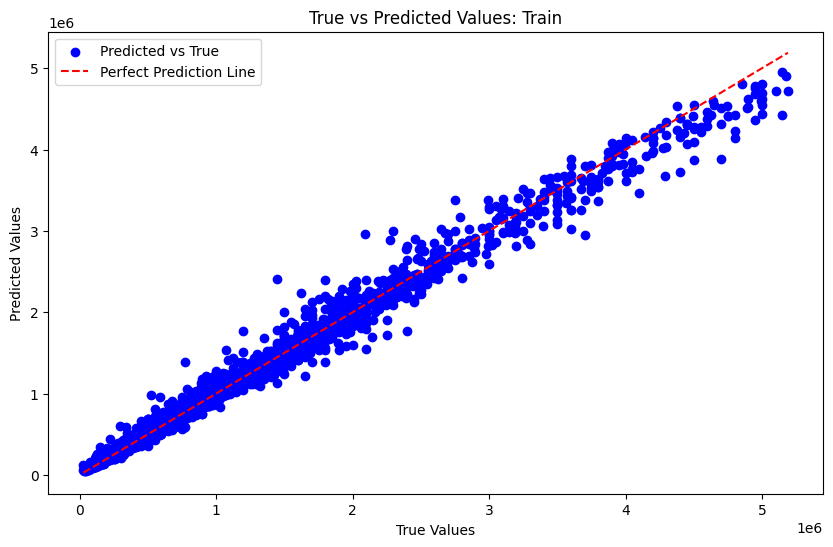

In [104]:
# Plot true vs predicted values for test set
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(y_train, train_predictions, color='blue', label='Predicted vs True')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linestyle='--', label='Perfect Prediction Line')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values: Train')
plt.legend()
plt.show()

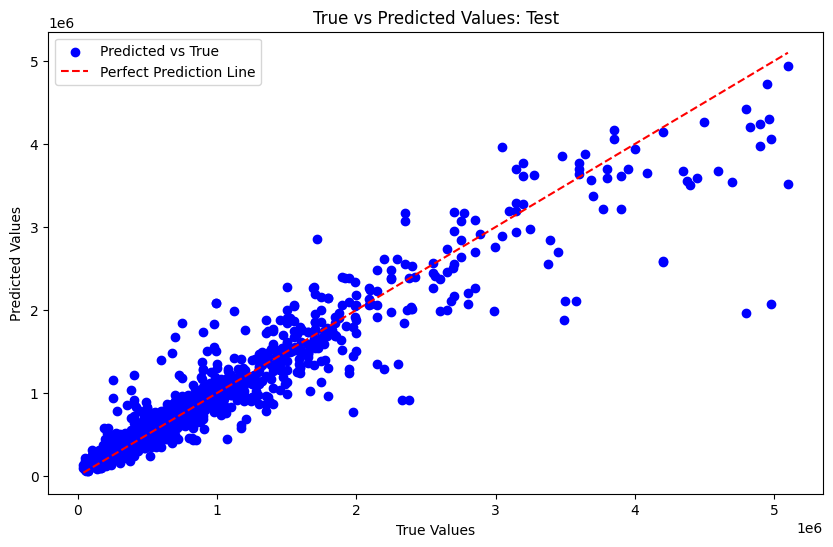

In [105]:
# Plot true vs predicted values for test set
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(y_test, test_predictions, color='blue', label='Predicted vs True')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction Line')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values: Test')
plt.legend()
plt.show()

### XGBoost

In [106]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Assume df_x (input features) and df_y (target) are already defined
# Encode any categorical variables in df_x if needed
df_x_encoded = df_x.copy()

for col in df_x_encoded.select_dtypes(include='object').columns:
    df_x_encoded[col] = LabelEncoder().fit_transform(df_x_encoded[col].astype(str))

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df_x_encoded, df_y, test_size=0.2, random_state=42)

# Train XGBoost model
xgb = XGBRegressor(n_estimators=100, random_state=42)
xgb.fit(X_train, y_train.values.ravel())

# Make predictions on train and test data
train_predictions = xgb.predict(X_train)
test_predictions = xgb.predict(X_test)

# Calculate evaluation metrics: MAE, MSE, R-squared
train_mae = mean_absolute_error(y_train, train_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)

train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

# Display the metrics
print(f"Train MAE: {train_mae}")
print(f"Test MAE: {test_mae}")

print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")

print(f"Train R-squared: {train_r2}")
print(f"Test R-squared: {test_r2}")


Train MAE: 58310.3203125
Test MAE: 127514.703125
Train MSE: 6616922112.0
Test MSE: 61240049664.0
Train R-squared: 0.9884160161018372
Test R-squared: 0.9035300612449646


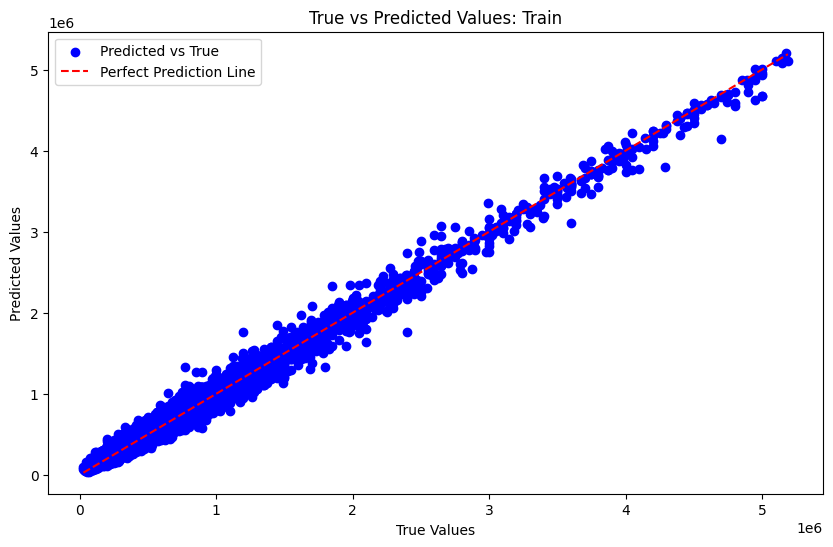

In [107]:
# Plot true vs predicted values for test set
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(y_train, train_predictions, color='blue', label='Predicted vs True')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linestyle='--', label='Perfect Prediction Line')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values: Train')
plt.legend()
plt.show()

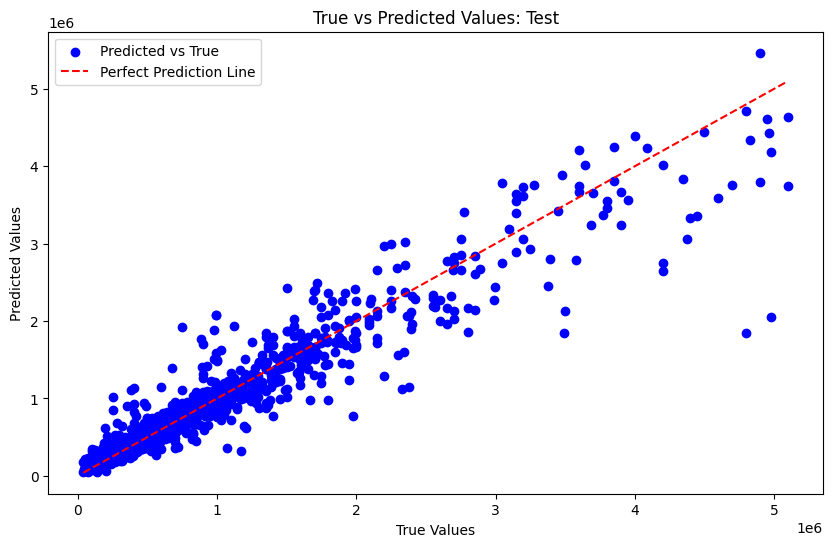

In [108]:
# Plot true vs predicted values for test set
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(y_test, test_predictions, color='blue', label='Predicted vs True')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction Line')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values: Test')
plt.legend()
plt.show()